In [1]:
import tensorflow as tf
import numpy as np
import random
from constants import TASK_LIST
from constants import INITIAL_ALPHA
from constants import INITIAL_GAMMA
from constants import EPSILON
from constants import NUM_TRA_EPISODES
from constants import NUM_EVAL_EPISODES
from scene_loader import THORDiscreteEnvironment as Environment
from RLalgs.utils import epsilon_greedy
from RLalgs.utils import action_selection


def QLearning(env, num_episodes, gamma, lr, e, plot_list):
    """
    Implement the Q-learning algorithm following the epsilon-greedy exploration.

    Inputs:
    env: THORDiscreteEnvironment
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.

    Outputs:
    Q: numpy.ndarray
    """

    Q = np.zeros((env.n_locations, env.nA))
    #i =0
    #while True:
    for i in range(num_episodes):
        env.reset()
        current_state = env.current_state_id
        episode_reward = 0
        episode_length = 0
        start = current_state
        if start not in plot_list:
            plot_list[start]=[]
        delta = []
        while env.terminal==False and episode_length<10000:
            action = epsilon_greedy(Q[current_state], e)
            env.step(action)
            S = env.current_state_id
            if env.terminal == True:
                R = 10
            elif env.collided == True:
                R = -0.1
            else: R = -0.01
            episode_length += 1
            episode_reward += R
            delta.append(R + gamma * np.max(Q[S]) - Q[current_state, action])
            Q[current_state, action] = Q[current_state, action] + lr * (R + gamma * np.max(Q[S]) - Q[current_state, action])
            current_state = S
        #i = i+1
        print ("episodes: ", i)
        print ("reward: ", episode_reward)
        plot_list[start].append(episode_reward)
        #if abs(np.mean(delta)) < 0.001: break

    

    return Q






RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


In [2]:
# #Q Learning for realizing the navigation
# if __name__ == '__main__':

list_of_tasks = TASK_LIST
scene_scopes = list_of_tasks.keys()

initial_learning_rate = INITIAL_ALPHA
gamma = INITIAL_GAMMA

branches = []
for scene in scene_scopes:
    for task in list_of_tasks[scene]:
        branches.append((scene, task))

scene, task = branches[0]


env = Environment({
    'scene_name': scene,
    'terminal_state_id': int(task)
})
env.reset()
plot_list = {}
Q = QLearning(env, NUM_TRA_EPISODES, gamma, initial_learning_rate, EPSILON, plot_list)
print (Q)



episodes:  0
reward:  3.7600000000000415
episodes:  1
reward:  7.9
episodes:  2
reward:  5.800000000000024
episodes:  3
reward:  7.340000000000009
episodes:  4
reward:  6.330000000000023
episodes:  5
reward:  9.66
episodes:  6
reward:  7.780000000000003
episodes:  7
reward:  9.98
episodes:  8
reward:  10
episodes:  9
reward:  9.64
episodes:  10
reward:  7.000000000000018
episodes:  11
reward:  8.459999999999999
episodes:  12
reward:  9.97
episodes:  13
reward:  8.03
episodes:  14
reward:  8.729999999999999
episodes:  15
reward:  9.98
episodes:  16
reward:  9.459999999999999
episodes:  17
reward:  9.98
episodes:  18
reward:  9.97
episodes:  19
reward:  9.98
episodes:  20
reward:  9.91
episodes:  21
reward:  9.75
episodes:  22
reward:  9.28
episodes:  23
reward:  8.389999999999999
episodes:  24
reward:  7.510000000000007
episodes:  25
reward:  9.87
episodes:  26
reward:  9.72
episodes:  27
reward:  9.66
episodes:  28
reward:  8.149999999999999
episodes:  29
reward:  9.82
episodes:  30
re

episodes:  278
reward:  9.91
episodes:  279
reward:  9.92
episodes:  280
reward:  9.9
episodes:  281
reward:  9.97
episodes:  282
reward:  9.91
episodes:  283
reward:  9.93
episodes:  284
reward:  9.95
episodes:  285
reward:  9.9
episodes:  286
reward:  9.96
episodes:  287
reward:  9.91
episodes:  288
reward:  9.99
episodes:  289
reward:  9.91
episodes:  290
reward:  9.86
episodes:  291
reward:  9.9
episodes:  292
reward:  9.91
episodes:  293
reward:  9.98
episodes:  294
reward:  9.93
episodes:  295
reward:  9.93
episodes:  296
reward:  9.96
episodes:  297
reward:  9.99
episodes:  298
reward:  9.91
episodes:  299
reward:  9.9
episodes:  300
reward:  9.86
episodes:  301
reward:  9.92
episodes:  302
reward:  9.87
episodes:  303
reward:  9.95
episodes:  304
reward:  9.98
episodes:  305
reward:  9.88
episodes:  306
reward:  9.73
episodes:  307
reward:  9.97
episodes:  308
reward:  9.93
episodes:  309
reward:  9.93
episodes:  310
reward:  9.97
episodes:  311
reward:  9.91
episodes:  312
rew

episodes:  581
reward:  9.93
episodes:  582
reward:  9.95
episodes:  583
reward:  9.98
episodes:  584
reward:  9.88
episodes:  585
reward:  9.94
episodes:  586
reward:  9.98
episodes:  587
reward:  9.95
episodes:  588
reward:  9.88
episodes:  589
reward:  9.94
episodes:  590
reward:  9.97
episodes:  591
reward:  9.94
episodes:  592
reward:  9.94
episodes:  593
reward:  9.91
episodes:  594
reward:  9.9
episodes:  595
reward:  9.97
episodes:  596
reward:  9.93
episodes:  597
reward:  9.95
episodes:  598
reward:  9.93
episodes:  599
reward:  9.97
episodes:  600
reward:  9.9
episodes:  601
reward:  9.92
episodes:  602
reward:  9.89
episodes:  603
reward:  9.87
episodes:  604
reward:  9.83
episodes:  605
reward:  9.95
episodes:  606
reward:  9.95
episodes:  607
reward:  9.95
episodes:  608
reward:  9.98
episodes:  609
reward:  9.9
episodes:  610
reward:  9.87
episodes:  611
reward:  9.88
episodes:  612
reward:  9.92
episodes:  613
reward:  9.97
episodes:  614
reward:  10
episodes:  615
rewa

episodes:  869
reward:  9.96
episodes:  870
reward:  9.94
episodes:  871
reward:  9.89
episodes:  872
reward:  9.94
episodes:  873
reward:  9.81
episodes:  874
reward:  9.95
episodes:  875
reward:  9.95
episodes:  876
reward:  9.95
episodes:  877
reward:  9.88
episodes:  878
reward:  9.94
episodes:  879
reward:  9.89
episodes:  880
reward:  9.88
episodes:  881
reward:  9.97
episodes:  882
reward:  9.93
episodes:  883
reward:  9.93
episodes:  884
reward:  9.91
episodes:  885
reward:  9.94
episodes:  886
reward:  9.91
episodes:  887
reward:  9.93
episodes:  888
reward:  9.95
episodes:  889
reward:  9.92
episodes:  890
reward:  9.94
episodes:  891
reward:  9.95
episodes:  892
reward:  9.95
episodes:  893
reward:  9.99
episodes:  894
reward:  9.94
episodes:  895
reward:  9.98
episodes:  896
reward:  9.97
episodes:  897
reward:  9.94
episodes:  898
reward:  9.96
episodes:  899
reward:  9.86
episodes:  900
reward:  9.87
episodes:  901
reward:  9.95
episodes:  902
reward:  9.9
episodes:  903


episodes:  1157
reward:  9.89
episodes:  1158
reward:  9.89
episodes:  1159
reward:  9.95
episodes:  1160
reward:  9.99
episodes:  1161
reward:  9.96
episodes:  1162
reward:  9.98
episodes:  1163
reward:  9.86
episodes:  1164
reward:  9.9
episodes:  1165
reward:  9.95
episodes:  1166
reward:  9.93
episodes:  1167
reward:  9.96
episodes:  1168
reward:  9.96
episodes:  1169
reward:  9.99
episodes:  1170
reward:  9.91
episodes:  1171
reward:  9.9
episodes:  1172
reward:  9.96
episodes:  1173
reward:  9.94
episodes:  1174
reward:  9.88
episodes:  1175
reward:  9.96
episodes:  1176
reward:  9.93
episodes:  1177
reward:  9.95
episodes:  1178
reward:  9.98
episodes:  1179
reward:  9.96
episodes:  1180
reward:  9.94
episodes:  1181
reward:  9.98
episodes:  1182
reward:  9.91
episodes:  1183
reward:  9.92
episodes:  1184
reward:  9.93
episodes:  1185
reward:  9.94
episodes:  1186
reward:  9.93
episodes:  1187
reward:  9.95
episodes:  1188
reward:  9.93
episodes:  1189
reward:  9.95
episodes:  1

episodes:  1437
reward:  9.91
episodes:  1438
reward:  9.93
episodes:  1439
reward:  9.94
episodes:  1440
reward:  9.96
episodes:  1441
reward:  9.96
episodes:  1442
reward:  9.71
episodes:  1443
reward:  9.95
episodes:  1444
reward:  9.95
episodes:  1445
reward:  9.95
episodes:  1446
reward:  9.93
episodes:  1447
reward:  9.94
episodes:  1448
reward:  9.97
episodes:  1449
reward:  9.84
episodes:  1450
reward:  9.97
episodes:  1451
reward:  9.96
episodes:  1452
reward:  9.91
episodes:  1453
reward:  9.82
episodes:  1454
reward:  9.91
episodes:  1455
reward:  9.89
episodes:  1456
reward:  9.96
episodes:  1457
reward:  9.92
episodes:  1458
reward:  9.93
episodes:  1459
reward:  9.97
episodes:  1460
reward:  9.92
episodes:  1461
reward:  9.91
episodes:  1462
reward:  9.89
episodes:  1463
reward:  9.9
episodes:  1464
reward:  9.87
episodes:  1465
reward:  9.96
episodes:  1466
reward:  9.97
episodes:  1467
reward:  9.92
episodes:  1468
reward:  9.96
episodes:  1469
reward:  9.92
episodes:  

episodes:  1713
reward:  9.95
episodes:  1714
reward:  9.91
episodes:  1715
reward:  9.9
episodes:  1716
reward:  9.92
episodes:  1717
reward:  9.98
episodes:  1718
reward:  9.9
episodes:  1719
reward:  9.91
episodes:  1720
reward:  9.93
episodes:  1721
reward:  9.97
episodes:  1722
reward:  9.97
episodes:  1723
reward:  10
episodes:  1724
reward:  9.89
episodes:  1725
reward:  9.9
episodes:  1726
reward:  9.94
episodes:  1727
reward:  9.93
episodes:  1728
reward:  9.94
episodes:  1729
reward:  9.98
episodes:  1730
reward:  9.92
episodes:  1731
reward:  9.95
episodes:  1732
reward:  9.99
episodes:  1733
reward:  9.88
episodes:  1734
reward:  9.93
episodes:  1735
reward:  9.97
episodes:  1736
reward:  9.93
episodes:  1737
reward:  9.98
episodes:  1738
reward:  9.99
episodes:  1739
reward:  9.92
episodes:  1740
reward:  9.95
episodes:  1741
reward:  9.96
episodes:  1742
reward:  9.95
episodes:  1743
reward:  9.95
episodes:  1744
reward:  9.94
episodes:  1745
reward:  9.93
episodes:  1746

episodes:  1988
reward:  9.99
episodes:  1989
reward:  9.88
episodes:  1990
reward:  9.93
episodes:  1991
reward:  9.94
episodes:  1992
reward:  9.9
episodes:  1993
reward:  9.96
episodes:  1994
reward:  9.85
episodes:  1995
reward:  9.97
episodes:  1996
reward:  9.93
episodes:  1997
reward:  9.94
episodes:  1998
reward:  9.91
episodes:  1999
reward:  9.95
episodes:  2000
reward:  9.88
episodes:  2001
reward:  9.9
episodes:  2002
reward:  9.98
episodes:  2003
reward:  9.94
episodes:  2004
reward:  9.93
episodes:  2005
reward:  9.92
episodes:  2006
reward:  9.97
episodes:  2007
reward:  9.95
episodes:  2008
reward:  9.9
episodes:  2009
reward:  9.98
episodes:  2010
reward:  9.98
episodes:  2011
reward:  9.98
episodes:  2012
reward:  9.99
episodes:  2013
reward:  9.96
episodes:  2014
reward:  9.93
episodes:  2015
reward:  9.96
episodes:  2016
reward:  9.9
episodes:  2017
reward:  9.87
episodes:  2018
reward:  9.89
episodes:  2019
reward:  9.9
episodes:  2020
reward:  9.95
episodes:  2021

episodes:  2289
reward:  9.92
episodes:  2290
reward:  9.94
episodes:  2291
reward:  9.92
episodes:  2292
reward:  9.92
episodes:  2293
reward:  9.9
episodes:  2294
reward:  9.93
episodes:  2295
reward:  9.93
episodes:  2296
reward:  9.89
episodes:  2297
reward:  9.98
episodes:  2298
reward:  9.93
episodes:  2299
reward:  9.93
episodes:  2300
reward:  9.89
episodes:  2301
reward:  9.99
episodes:  2302
reward:  9.96
episodes:  2303
reward:  9.96
episodes:  2304
reward:  9.95
episodes:  2305
reward:  9.93
episodes:  2306
reward:  9.93
episodes:  2307
reward:  9.91
episodes:  2308
reward:  9.92
episodes:  2309
reward:  9.96
episodes:  2310
reward:  9.93
episodes:  2311
reward:  9.89
episodes:  2312
reward:  9.92
episodes:  2313
reward:  9.89
episodes:  2314
reward:  9.97
episodes:  2315
reward:  9.95
episodes:  2316
reward:  9.98
episodes:  2317
reward:  9.88
episodes:  2318
reward:  9.92
episodes:  2319
reward:  9.95
episodes:  2320
reward:  9.93
episodes:  2321
reward:  9.98
episodes:  

episodes:  2574
reward:  9.96
episodes:  2575
reward:  9.95
episodes:  2576
reward:  9.93
episodes:  2577
reward:  9.92
episodes:  2578
reward:  9.87
episodes:  2579
reward:  10
episodes:  2580
reward:  9.9
episodes:  2581
reward:  9.87
episodes:  2582
reward:  9.88
episodes:  2583
reward:  9.95
episodes:  2584
reward:  9.9
episodes:  2585
reward:  9.95
episodes:  2586
reward:  9.9
episodes:  2587
reward:  9.93
episodes:  2588
reward:  9.91
episodes:  2589
reward:  9.9
episodes:  2590
reward:  10
episodes:  2591
reward:  9.86
episodes:  2592
reward:  9.87
episodes:  2593
reward:  9.89
episodes:  2594
reward:  9.88
episodes:  2595
reward:  9.93
episodes:  2596
reward:  9.97
episodes:  2597
reward:  9.96
episodes:  2598
reward:  9.91
episodes:  2599
reward:  9.92
episodes:  2600
reward:  9.93
episodes:  2601
reward:  10
episodes:  2602
reward:  9.93
episodes:  2603
reward:  9.92
episodes:  2604
reward:  10
episodes:  2605
reward:  9.96
episodes:  2606
reward:  9.95
episodes:  2607
reward

episodes:  2855
reward:  9.88
episodes:  2856
reward:  9.91
episodes:  2857
reward:  10
episodes:  2858
reward:  9.96
episodes:  2859
reward:  9.95
episodes:  2860
reward:  9.94
episodes:  2861
reward:  9.85
episodes:  2862
reward:  9.97
episodes:  2863
reward:  9.97
episodes:  2864
reward:  9.96
episodes:  2865
reward:  9.9
episodes:  2866
reward:  9.97
episodes:  2867
reward:  9.96
episodes:  2868
reward:  9.92
episodes:  2869
reward:  9.83
episodes:  2870
reward:  9.98
episodes:  2871
reward:  9.89
episodes:  2872
reward:  9.89
episodes:  2873
reward:  9.95
episodes:  2874
reward:  9.99
episodes:  2875
reward:  9.93
episodes:  2876
reward:  9.96
episodes:  2877
reward:  9.95
episodes:  2878
reward:  9.96
episodes:  2879
reward:  9.98
episodes:  2880
reward:  9.87
episodes:  2881
reward:  9.96
episodes:  2882
reward:  9.94
episodes:  2883
reward:  9.88
episodes:  2884
reward:  9.91
episodes:  2885
reward:  9.92
episodes:  2886
reward:  9.99
episodes:  2887
reward:  9.88
episodes:  28

episodes:  3148
reward:  9.95
episodes:  3149
reward:  9.88
episodes:  3150
reward:  9.94
episodes:  3151
reward:  9.91
episodes:  3152
reward:  9.91
episodes:  3153
reward:  9.97
episodes:  3154
reward:  9.99
episodes:  3155
reward:  9.94
episodes:  3156
reward:  9.86
episodes:  3157
reward:  9.82
episodes:  3158
reward:  9.95
episodes:  3159
reward:  9.94
episodes:  3160
reward:  9.97
episodes:  3161
reward:  9.98
episodes:  3162
reward:  9.94
episodes:  3163
reward:  9.91
episodes:  3164
reward:  9.88
episodes:  3165
reward:  9.93
episodes:  3166
reward:  9.93
episodes:  3167
reward:  9.96
episodes:  3168
reward:  9.95
episodes:  3169
reward:  9.94
episodes:  3170
reward:  9.94
episodes:  3171
reward:  9.95
episodes:  3172
reward:  9.94
episodes:  3173
reward:  9.85
episodes:  3174
reward:  9.97
episodes:  3175
reward:  9.94
episodes:  3176
reward:  9.9
episodes:  3177
reward:  9.94
episodes:  3178
reward:  9.97
episodes:  3179
reward:  9.94
episodes:  3180
reward:  9.9
episodes:  3

episodes:  3436
reward:  9.84
episodes:  3437
reward:  9.97
episodes:  3438
reward:  9.97
episodes:  3439
reward:  9.89
episodes:  3440
reward:  9.92
episodes:  3441
reward:  9.95
episodes:  3442
reward:  9.78
episodes:  3443
reward:  9.89
episodes:  3444
reward:  9.94
episodes:  3445
reward:  9.91
episodes:  3446
reward:  9.89
episodes:  3447
reward:  9.94
episodes:  3448
reward:  9.93
episodes:  3449
reward:  9.93
episodes:  3450
reward:  9.96
episodes:  3451
reward:  9.99
episodes:  3452
reward:  9.98
episodes:  3453
reward:  9.83
episodes:  3454
reward:  9.96
episodes:  3455
reward:  9.82
episodes:  3456
reward:  9.9
episodes:  3457
reward:  9.99
episodes:  3458
reward:  9.94
episodes:  3459
reward:  9.96
episodes:  3460
reward:  9.88
episodes:  3461
reward:  9.85
episodes:  3462
reward:  9.96
episodes:  3463
reward:  9.95
episodes:  3464
reward:  9.85
episodes:  3465
reward:  9.9
episodes:  3466
reward:  9.93
episodes:  3467
reward:  9.95
episodes:  3468
reward:  9.92
episodes:  3

episodes:  3712
reward:  9.91
episodes:  3713
reward:  9.96
episodes:  3714
reward:  9.93
episodes:  3715
reward:  9.96
episodes:  3716
reward:  9.93
episodes:  3717
reward:  9.88
episodes:  3718
reward:  9.95
episodes:  3719
reward:  9.95
episodes:  3720
reward:  9.94
episodes:  3721
reward:  9.92
episodes:  3722
reward:  9.95
episodes:  3723
reward:  9.96
episodes:  3724
reward:  9.92
episodes:  3725
reward:  9.95
episodes:  3726
reward:  9.87
episodes:  3727
reward:  9.96
episodes:  3728
reward:  9.98
episodes:  3729
reward:  9.93
episodes:  3730
reward:  9.96
episodes:  3731
reward:  9.95
episodes:  3732
reward:  9.92
episodes:  3733
reward:  9.94
episodes:  3734
reward:  9.98
episodes:  3735
reward:  9.93
episodes:  3736
reward:  9.88
episodes:  3737
reward:  9.89
episodes:  3738
reward:  9.94
episodes:  3739
reward:  9.95
episodes:  3740
reward:  9.9
episodes:  3741
reward:  9.99
episodes:  3742
reward:  9.95
episodes:  3743
reward:  9.82
episodes:  3744
reward:  9.98
episodes:  

episodes:  3996
reward:  9.93
episodes:  3997
reward:  9.93
episodes:  3998
reward:  9.9
episodes:  3999
reward:  9.95
episodes:  4000
reward:  9.93
episodes:  4001
reward:  9.94
episodes:  4002
reward:  9.97
episodes:  4003
reward:  9.91
episodes:  4004
reward:  9.93
episodes:  4005
reward:  9.97
episodes:  4006
reward:  9.96
episodes:  4007
reward:  9.92
episodes:  4008
reward:  9.99
episodes:  4009
reward:  9.96
episodes:  4010
reward:  9.94
episodes:  4011
reward:  9.94
episodes:  4012
reward:  9.91
episodes:  4013
reward:  9.95
episodes:  4014
reward:  9.93
episodes:  4015
reward:  9.98
episodes:  4016
reward:  9.96
episodes:  4017
reward:  9.94
episodes:  4018
reward:  9.89
episodes:  4019
reward:  9.88
episodes:  4020
reward:  9.94
episodes:  4021
reward:  9.98
episodes:  4022
reward:  9.92
episodes:  4023
reward:  9.97
episodes:  4024
reward:  9.96
episodes:  4025
reward:  9.98
episodes:  4026
reward:  9.94
episodes:  4027
reward:  9.96
episodes:  4028
reward:  9.91
episodes:  

episodes:  4296
reward:  9.97
episodes:  4297
reward:  9.91
episodes:  4298
reward:  9.91
episodes:  4299
reward:  10
episodes:  4300
reward:  9.9
episodes:  4301
reward:  9.89
episodes:  4302
reward:  9.97
episodes:  4303
reward:  9.93
episodes:  4304
reward:  9.86
episodes:  4305
reward:  9.94
episodes:  4306
reward:  9.95
episodes:  4307
reward:  9.88
episodes:  4308
reward:  9.96
episodes:  4309
reward:  9.94
episodes:  4310
reward:  9.96
episodes:  4311
reward:  9.98
episodes:  4312
reward:  9.94
episodes:  4313
reward:  9.95
episodes:  4314
reward:  9.97
episodes:  4315
reward:  10
episodes:  4316
reward:  9.94
episodes:  4317
reward:  9.98
episodes:  4318
reward:  9.95
episodes:  4319
reward:  9.94
episodes:  4320
reward:  9.9
episodes:  4321
reward:  9.93
episodes:  4322
reward:  9.95
episodes:  4323
reward:  9.95
episodes:  4324
reward:  9.97
episodes:  4325
reward:  9.93
episodes:  4326
reward:  9.89
episodes:  4327
reward:  9.92
episodes:  4328
reward:  9.96
episodes:  4329


episodes:  4577
reward:  9.91
episodes:  4578
reward:  9.89
episodes:  4579
reward:  9.94
episodes:  4580
reward:  9.95
episodes:  4581
reward:  9.95
episodes:  4582
reward:  9.93
episodes:  4583
reward:  9.96
episodes:  4584
reward:  9.98
episodes:  4585
reward:  9.89
episodes:  4586
reward:  9.9
episodes:  4587
reward:  9.93
episodes:  4588
reward:  9.94
episodes:  4589
reward:  9.95
episodes:  4590
reward:  9.89
episodes:  4591
reward:  9.91
episodes:  4592
reward:  9.97
episodes:  4593
reward:  9.91
episodes:  4594
reward:  9.95
episodes:  4595
reward:  9.92
episodes:  4596
reward:  9.97
episodes:  4597
reward:  9.98
episodes:  4598
reward:  9.92
episodes:  4599
reward:  9.88
episodes:  4600
reward:  9.81
episodes:  4601
reward:  9.94
episodes:  4602
reward:  9.93
episodes:  4603
reward:  9.95
episodes:  4604
reward:  9.95
episodes:  4605
reward:  9.89
episodes:  4606
reward:  9.96
episodes:  4607
reward:  9.99
episodes:  4608
reward:  9.94
episodes:  4609
reward:  10
episodes:  46

episodes:  4856
reward:  9.94
episodes:  4857
reward:  9.98
episodes:  4858
reward:  9.97
episodes:  4859
reward:  9.95
episodes:  4860
reward:  9.96
episodes:  4861
reward:  9.9
episodes:  4862
reward:  9.81
episodes:  4863
reward:  9.83
episodes:  4864
reward:  9.96
episodes:  4865
reward:  9.98
episodes:  4866
reward:  9.99
episodes:  4867
reward:  9.94
episodes:  4868
reward:  9.92
episodes:  4869
reward:  9.91
episodes:  4870
reward:  9.92
episodes:  4871
reward:  9.94
episodes:  4872
reward:  9.91
episodes:  4873
reward:  9.88
episodes:  4874
reward:  9.95
episodes:  4875
reward:  9.99
episodes:  4876
reward:  9.96
episodes:  4877
reward:  9.9
episodes:  4878
reward:  9.96
episodes:  4879
reward:  9.97
episodes:  4880
reward:  9.94
episodes:  4881
reward:  9.96
episodes:  4882
reward:  9.77
episodes:  4883
reward:  9.96
episodes:  4884
reward:  9.96
episodes:  4885
reward:  9.98
episodes:  4886
reward:  9.94
episodes:  4887
reward:  9.94
episodes:  4888
reward:  9.94
episodes:  4

episodes:  5143
reward:  9.98
episodes:  5144
reward:  9.92
episodes:  5145
reward:  9.92
episodes:  5146
reward:  9.9
episodes:  5147
reward:  9.99
episodes:  5148
reward:  9.95
episodes:  5149
reward:  9.99
episodes:  5150
reward:  9.98
episodes:  5151
reward:  9.91
episodes:  5152
reward:  9.95
episodes:  5153
reward:  9.96
episodes:  5154
reward:  9.93
episodes:  5155
reward:  9.95
episodes:  5156
reward:  9.85
episodes:  5157
reward:  9.96
episodes:  5158
reward:  9.99
episodes:  5159
reward:  9.92
episodes:  5160
reward:  9.97
episodes:  5161
reward:  9.93
episodes:  5162
reward:  9.9
episodes:  5163
reward:  9.83
episodes:  5164
reward:  9.94
episodes:  5165
reward:  9.94
episodes:  5166
reward:  9.94
episodes:  5167
reward:  9.96
episodes:  5168
reward:  9.93
episodes:  5169
reward:  9.94
episodes:  5170
reward:  9.96
episodes:  5171
reward:  9.97
episodes:  5172
reward:  9.91
episodes:  5173
reward:  9.95
episodes:  5174
reward:  9.95
episodes:  5175
reward:  9.89
episodes:  5

episodes:  5423
reward:  9.98
episodes:  5424
reward:  9.93
episodes:  5425
reward:  9.87
episodes:  5426
reward:  9.96
episodes:  5427
reward:  9.96
episodes:  5428
reward:  9.94
episodes:  5429
reward:  9.92
episodes:  5430
reward:  9.95
episodes:  5431
reward:  9.93
episodes:  5432
reward:  9.94
episodes:  5433
reward:  10
episodes:  5434
reward:  9.94
episodes:  5435
reward:  9.99
episodes:  5436
reward:  9.98
episodes:  5437
reward:  9.93
episodes:  5438
reward:  9.99
episodes:  5439
reward:  9.89
episodes:  5440
reward:  9.88
episodes:  5441
reward:  9.95
episodes:  5442
reward:  9.96
episodes:  5443
reward:  9.97
episodes:  5444
reward:  9.92
episodes:  5445
reward:  9.87
episodes:  5446
reward:  9.92
episodes:  5447
reward:  9.98
episodes:  5448
reward:  9.91
episodes:  5449
reward:  9.9
episodes:  5450
reward:  9.92
episodes:  5451
reward:  9.99
episodes:  5452
reward:  9.95
episodes:  5453
reward:  9.91
episodes:  5454
reward:  9.94
episodes:  5455
reward:  9.91
episodes:  54

episodes:  5705
reward:  9.89
episodes:  5706
reward:  9.95
episodes:  5707
reward:  9.98
episodes:  5708
reward:  9.96
episodes:  5709
reward:  9.91
episodes:  5710
reward:  9.94
episodes:  5711
reward:  9.95
episodes:  5712
reward:  9.96
episodes:  5713
reward:  9.94
episodes:  5714
reward:  9.88
episodes:  5715
reward:  9.94
episodes:  5716
reward:  9.91
episodes:  5717
reward:  9.96
episodes:  5718
reward:  9.87
episodes:  5719
reward:  9.94
episodes:  5720
reward:  9.95
episodes:  5721
reward:  9.88
episodes:  5722
reward:  9.96
episodes:  5723
reward:  9.96
episodes:  5724
reward:  9.95
episodes:  5725
reward:  9.9
episodes:  5726
reward:  9.77
episodes:  5727
reward:  9.94
episodes:  5728
reward:  9.89
episodes:  5729
reward:  9.9
episodes:  5730
reward:  9.95
episodes:  5731
reward:  9.94
episodes:  5732
reward:  9.94
episodes:  5733
reward:  9.94
episodes:  5734
reward:  9.85
episodes:  5735
reward:  9.87
episodes:  5736
reward:  9.93
episodes:  5737
reward:  9.91
episodes:  5

episodes:  5984
reward:  9.96
episodes:  5985
reward:  9.89
episodes:  5986
reward:  9.98
episodes:  5987
reward:  9.94
episodes:  5988
reward:  9.89
episodes:  5989
reward:  9.99
episodes:  5990
reward:  9.93
episodes:  5991
reward:  9.94
episodes:  5992
reward:  9.89
episodes:  5993
reward:  9.94
episodes:  5994
reward:  9.92
episodes:  5995
reward:  9.95
episodes:  5996
reward:  9.94
episodes:  5997
reward:  9.89
episodes:  5998
reward:  9.87
episodes:  5999
reward:  9.97
episodes:  6000
reward:  9.9
episodes:  6001
reward:  9.96
episodes:  6002
reward:  9.97
episodes:  6003
reward:  9.9
episodes:  6004
reward:  9.86
episodes:  6005
reward:  9.97
episodes:  6006
reward:  9.92
episodes:  6007
reward:  9.92
episodes:  6008
reward:  9.93
episodes:  6009
reward:  9.94
episodes:  6010
reward:  9.92
episodes:  6011
reward:  9.9
episodes:  6012
reward:  9.9
episodes:  6013
reward:  9.94
episodes:  6014
reward:  9.99
episodes:  6015
reward:  9.9
episodes:  6016
reward:  9.94
episodes:  6017

episodes:  6286
reward:  9.95
episodes:  6287
reward:  9.96
episodes:  6288
reward:  9.93
episodes:  6289
reward:  9.93
episodes:  6290
reward:  9.95
episodes:  6291
reward:  9.98
episodes:  6292
reward:  10
episodes:  6293
reward:  9.8
episodes:  6294
reward:  9.94
episodes:  6295
reward:  9.89
episodes:  6296
reward:  9.94
episodes:  6297
reward:  9.93
episodes:  6298
reward:  9.95
episodes:  6299
reward:  9.89
episodes:  6300
reward:  9.96
episodes:  6301
reward:  9.9
episodes:  6302
reward:  9.95
episodes:  6303
reward:  9.97
episodes:  6304
reward:  9.91
episodes:  6305
reward:  9.91
episodes:  6306
reward:  9.96
episodes:  6307
reward:  9.96
episodes:  6308
reward:  9.91
episodes:  6309
reward:  9.92
episodes:  6310
reward:  9.95
episodes:  6311
reward:  9.9
episodes:  6312
reward:  9.94
episodes:  6313
reward:  9.95
episodes:  6314
reward:  9.98
episodes:  6315
reward:  9.96
episodes:  6316
reward:  9.95
episodes:  6317
reward:  9.89
episodes:  6318
reward:  9.89
episodes:  6319

episodes:  6585
reward:  9.95
episodes:  6586
reward:  9.95
episodes:  6587
reward:  9.95
episodes:  6588
reward:  9.89
episodes:  6589
reward:  9.93
episodes:  6590
reward:  9.93
episodes:  6591
reward:  9.9
episodes:  6592
reward:  9.96
episodes:  6593
reward:  9.95
episodes:  6594
reward:  9.88
episodes:  6595
reward:  9.89
episodes:  6596
reward:  9.94
episodes:  6597
reward:  9.92
episodes:  6598
reward:  9.96
episodes:  6599
reward:  9.93
episodes:  6600
reward:  9.84
episodes:  6601
reward:  9.93
episodes:  6602
reward:  9.92
episodes:  6603
reward:  9.92
episodes:  6604
reward:  9.96
episodes:  6605
reward:  9.92
episodes:  6606
reward:  9.92
episodes:  6607
reward:  9.98
episodes:  6608
reward:  9.93
episodes:  6609
reward:  9.92
episodes:  6610
reward:  9.96
episodes:  6611
reward:  9.95
episodes:  6612
reward:  9.91
episodes:  6613
reward:  9.94
episodes:  6614
reward:  9.94
episodes:  6615
reward:  9.92
episodes:  6616
reward:  9.93
episodes:  6617
reward:  9.96
episodes:  

episodes:  6879
reward:  9.93
episodes:  6880
reward:  9.96
episodes:  6881
reward:  9.92
episodes:  6882
reward:  9.98
episodes:  6883
reward:  9.96
episodes:  6884
reward:  9.96
episodes:  6885
reward:  9.93
episodes:  6886
reward:  9.98
episodes:  6887
reward:  9.97
episodes:  6888
reward:  9.93
episodes:  6889
reward:  9.89
episodes:  6890
reward:  9.91
episodes:  6891
reward:  9.93
episodes:  6892
reward:  9.95
episodes:  6893
reward:  9.85
episodes:  6894
reward:  9.91
episodes:  6895
reward:  9.94
episodes:  6896
reward:  9.98
episodes:  6897
reward:  9.94
episodes:  6898
reward:  9.97
episodes:  6899
reward:  9.86
episodes:  6900
reward:  9.94
episodes:  6901
reward:  9.96
episodes:  6902
reward:  9.97
episodes:  6903
reward:  9.92
episodes:  6904
reward:  9.94
episodes:  6905
reward:  9.95
episodes:  6906
reward:  9.93
episodes:  6907
reward:  9.94
episodes:  6908
reward:  9.97
episodes:  6909
reward:  9.98
episodes:  6910
reward:  9.95
episodes:  6911
reward:  9.93
episodes: 

episodes:  7156
reward:  9.92
episodes:  7157
reward:  9.94
episodes:  7158
reward:  9.96
episodes:  7159
reward:  9.95
episodes:  7160
reward:  9.89
episodes:  7161
reward:  9.78
episodes:  7162
reward:  9.92
episodes:  7163
reward:  9.97
episodes:  7164
reward:  9.97
episodes:  7165
reward:  9.9
episodes:  7166
reward:  9.95
episodes:  7167
reward:  9.99
episodes:  7168
reward:  9.89
episodes:  7169
reward:  9.92
episodes:  7170
reward:  9.93
episodes:  7171
reward:  9.95
episodes:  7172
reward:  9.92
episodes:  7173
reward:  9.95
episodes:  7174
reward:  9.89
episodes:  7175
reward:  9.92
episodes:  7176
reward:  9.95
episodes:  7177
reward:  9.97
episodes:  7178
reward:  9.99
episodes:  7179
reward:  9.93
episodes:  7180
reward:  9.99
episodes:  7181
reward:  9.99
episodes:  7182
reward:  9.9
episodes:  7183
reward:  9.709999999999999
episodes:  7184
reward:  9.93
episodes:  7185
reward:  9.94
episodes:  7186
reward:  9.95
episodes:  7187
reward:  9.88
episodes:  7188
reward:  9.88

episodes:  7441
reward:  9.95
episodes:  7442
reward:  9.98
episodes:  7443
reward:  9.93
episodes:  7444
reward:  9.94
episodes:  7445
reward:  9.93
episodes:  7446
reward:  9.9
episodes:  7447
reward:  9.99
episodes:  7448
reward:  9.95
episodes:  7449
reward:  9.99
episodes:  7450
reward:  9.96
episodes:  7451
reward:  9.94
episodes:  7452
reward:  9.93
episodes:  7453
reward:  9.94
episodes:  7454
reward:  9.97
episodes:  7455
reward:  9.93
episodes:  7456
reward:  9.93
episodes:  7457
reward:  9.84
episodes:  7458
reward:  9.97
episodes:  7459
reward:  9.98
episodes:  7460
reward:  9.87
episodes:  7461
reward:  9.86
episodes:  7462
reward:  9.96
episodes:  7463
reward:  9.87
episodes:  7464
reward:  9.98
episodes:  7465
reward:  9.89
episodes:  7466
reward:  9.86
episodes:  7467
reward:  9.95
episodes:  7468
reward:  9.95
episodes:  7469
reward:  9.94
episodes:  7470
reward:  9.98
episodes:  7471
reward:  9.97
episodes:  7472
reward:  9.97
episodes:  7473
reward:  10
episodes:  74

episodes:  7744
reward:  9.94
episodes:  7745
reward:  9.97
episodes:  7746
reward:  9.9
episodes:  7747
reward:  9.96
episodes:  7748
reward:  9.86
episodes:  7749
reward:  9.95
episodes:  7750
reward:  9.92
episodes:  7751
reward:  9.92
episodes:  7752
reward:  9.91
episodes:  7753
reward:  9.89
episodes:  7754
reward:  9.94
episodes:  7755
reward:  9.88
episodes:  7756
reward:  9.95
episodes:  7757
reward:  9.93
episodes:  7758
reward:  9.99
episodes:  7759
reward:  9.93
episodes:  7760
reward:  9.96
episodes:  7761
reward:  9.96
episodes:  7762
reward:  9.96
episodes:  7763
reward:  9.92
episodes:  7764
reward:  9.89
episodes:  7765
reward:  9.93
episodes:  7766
reward:  9.96
episodes:  7767
reward:  9.98
episodes:  7768
reward:  9.96
episodes:  7769
reward:  9.89
episodes:  7770
reward:  9.92
episodes:  7771
reward:  9.96
episodes:  7772
reward:  9.95
episodes:  7773
reward:  9.96
episodes:  7774
reward:  9.91
episodes:  7775
reward:  9.91
episodes:  7776
reward:  9.96
episodes:  

episodes:  8019
reward:  9.79
episodes:  8020
reward:  9.93
episodes:  8021
reward:  9.95
episodes:  8022
reward:  9.93
episodes:  8023
reward:  9.93
episodes:  8024
reward:  9.94
episodes:  8025
reward:  9.91
episodes:  8026
reward:  9.94
episodes:  8027
reward:  9.93
episodes:  8028
reward:  9.92
episodes:  8029
reward:  9.83
episodes:  8030
reward:  9.93
episodes:  8031
reward:  9.98
episodes:  8032
reward:  9.98
episodes:  8033
reward:  9.95
episodes:  8034
reward:  9.95
episodes:  8035
reward:  9.82
episodes:  8036
reward:  9.91
episodes:  8037
reward:  9.93
episodes:  8038
reward:  9.97
episodes:  8039
reward:  9.89
episodes:  8040
reward:  9.86
episodes:  8041
reward:  9.94
episodes:  8042
reward:  9.92
episodes:  8043
reward:  9.96
episodes:  8044
reward:  9.98
episodes:  8045
reward:  9.96
episodes:  8046
reward:  9.92
episodes:  8047
reward:  9.86
episodes:  8048
reward:  9.91
episodes:  8049
reward:  9.96
episodes:  8050
reward:  9.98
episodes:  8051
reward:  9.92
episodes: 

episodes:  8298
reward:  9.99
episodes:  8299
reward:  9.98
episodes:  8300
reward:  9.93
episodes:  8301
reward:  9.93
episodes:  8302
reward:  9.92
episodes:  8303
reward:  9.9
episodes:  8304
reward:  9.91
episodes:  8305
reward:  9.92
episodes:  8306
reward:  9.9
episodes:  8307
reward:  9.97
episodes:  8308
reward:  9.94
episodes:  8309
reward:  9.93
episodes:  8310
reward:  9.77
episodes:  8311
reward:  9.93
episodes:  8312
reward:  9.93
episodes:  8313
reward:  9.93
episodes:  8314
reward:  9.95
episodes:  8315
reward:  9.96
episodes:  8316
reward:  9.99
episodes:  8317
reward:  9.96
episodes:  8318
reward:  10
episodes:  8319
reward:  9.95
episodes:  8320
reward:  9.97
episodes:  8321
reward:  9.98
episodes:  8322
reward:  9.99
episodes:  8323
reward:  9.99
episodes:  8324
reward:  9.96
episodes:  8325
reward:  9.93
episodes:  8326
reward:  9.86
episodes:  8327
reward:  9.99
episodes:  8328
reward:  9.93
episodes:  8329
reward:  9.95
episodes:  8330
reward:  9.98
episodes:  833

episodes:  8572
reward:  9.86
episodes:  8573
reward:  9.96
episodes:  8574
reward:  9.96
episodes:  8575
reward:  10
episodes:  8576
reward:  9.91
episodes:  8577
reward:  9.95
episodes:  8578
reward:  9.95
episodes:  8579
reward:  9.97
episodes:  8580
reward:  9.96
episodes:  8581
reward:  9.94
episodes:  8582
reward:  9.9
episodes:  8583
reward:  9.92
episodes:  8584
reward:  9.94
episodes:  8585
reward:  9.85
episodes:  8586
reward:  9.87
episodes:  8587
reward:  9.89
episodes:  8588
reward:  9.98
episodes:  8589
reward:  9.94
episodes:  8590
reward:  9.9
episodes:  8591
reward:  9.93
episodes:  8592
reward:  9.95
episodes:  8593
reward:  9.92
episodes:  8594
reward:  9.93
episodes:  8595
reward:  9.88
episodes:  8596
reward:  9.96
episodes:  8597
reward:  9.92
episodes:  8598
reward:  9.91
episodes:  8599
reward:  9.97
episodes:  8600
reward:  9.94
episodes:  8601
reward:  9.96
episodes:  8602
reward:  9.94
episodes:  8603
reward:  9.94
episodes:  8604
reward:  9.93
episodes:  860

episodes:  8849
reward:  9.9
episodes:  8850
reward:  9.91
episodes:  8851
reward:  9.9
episodes:  8852
reward:  9.96
episodes:  8853
reward:  9.93
episodes:  8854
reward:  9.98
episodes:  8855
reward:  9.79
episodes:  8856
reward:  9.9
episodes:  8857
reward:  9.95
episodes:  8858
reward:  9.98
episodes:  8859
reward:  9.88
episodes:  8860
reward:  9.96
episodes:  8861
reward:  9.91
episodes:  8862
reward:  9.95
episodes:  8863
reward:  9.9
episodes:  8864
reward:  9.93
episodes:  8865
reward:  9.89
episodes:  8866
reward:  9.93
episodes:  8867
reward:  9.93
episodes:  8868
reward:  9.97
episodes:  8869
reward:  9.93
episodes:  8870
reward:  9.94
episodes:  8871
reward:  9.94
episodes:  8872
reward:  9.88
episodes:  8873
reward:  10
episodes:  8874
reward:  9.84
episodes:  8875
reward:  9.89
episodes:  8876
reward:  9.98
episodes:  8877
reward:  9.92
episodes:  8878
reward:  9.9
episodes:  8879
reward:  9.84
episodes:  8880
reward:  9.93
episodes:  8881
reward:  9.93
episodes:  8882
r

episodes:  9131
reward:  9.82
episodes:  9132
reward:  9.81
episodes:  9133
reward:  9.94
episodes:  9134
reward:  9.95
episodes:  9135
reward:  9.95
episodes:  9136
reward:  9.95
episodes:  9137
reward:  9.93
episodes:  9138
reward:  9.9
episodes:  9139
reward:  10
episodes:  9140
reward:  9.93
episodes:  9141
reward:  9.92
episodes:  9142
reward:  9.74
episodes:  9143
reward:  9.95
episodes:  9144
reward:  9.94
episodes:  9145
reward:  9.97
episodes:  9146
reward:  9.96
episodes:  9147
reward:  9.94
episodes:  9148
reward:  10
episodes:  9149
reward:  9.95
episodes:  9150
reward:  9.97
episodes:  9151
reward:  9.94
episodes:  9152
reward:  9.92
episodes:  9153
reward:  9.83
episodes:  9154
reward:  9.96
episodes:  9155
reward:  9.88
episodes:  9156
reward:  9.91
episodes:  9157
reward:  9.86
episodes:  9158
reward:  9.9
episodes:  9159
reward:  9.92
episodes:  9160
reward:  9.92
episodes:  9161
reward:  9.89
episodes:  9162
reward:  9.98
episodes:  9163
reward:  9.86
episodes:  9164


episodes:  9417
reward:  9.93
episodes:  9418
reward:  9.96
episodes:  9419
reward:  9.96
episodes:  9420
reward:  9.96
episodes:  9421
reward:  9.96
episodes:  9422
reward:  9.9
episodes:  9423
reward:  9.9
episodes:  9424
reward:  9.97
episodes:  9425
reward:  9.94
episodes:  9426
reward:  9.96
episodes:  9427
reward:  9.89
episodes:  9428
reward:  9.88
episodes:  9429
reward:  9.89
episodes:  9430
reward:  9.92
episodes:  9431
reward:  9.92
episodes:  9432
reward:  9.95
episodes:  9433
reward:  9.99
episodes:  9434
reward:  9.96
episodes:  9435
reward:  9.91
episodes:  9436
reward:  9.94
episodes:  9437
reward:  9.92
episodes:  9438
reward:  9.93
episodes:  9439
reward:  9.88
episodes:  9440
reward:  9.94
episodes:  9441
reward:  9.92
episodes:  9442
reward:  9.96
episodes:  9443
reward:  9.9
episodes:  9444
reward:  9.94
episodes:  9445
reward:  9.95
episodes:  9446
reward:  9.93
episodes:  9447
reward:  9.94
episodes:  9448
reward:  9.97
episodes:  9449
reward:  9.97
episodes:  94

episodes:  9721
reward:  9.94
episodes:  9722
reward:  9.9
episodes:  9723
reward:  9.94
episodes:  9724
reward:  9.91
episodes:  9725
reward:  9.84
episodes:  9726
reward:  9.93
episodes:  9727
reward:  9.92
episodes:  9728
reward:  9.92
episodes:  9729
reward:  9.87
episodes:  9730
reward:  9.97
episodes:  9731
reward:  10
episodes:  9732
reward:  9.91
episodes:  9733
reward:  9.95
episodes:  9734
reward:  9.98
episodes:  9735
reward:  9.85
episodes:  9736
reward:  9.95
episodes:  9737
reward:  9.93
episodes:  9738
reward:  9.86
episodes:  9739
reward:  9.93
episodes:  9740
reward:  9.91
episodes:  9741
reward:  9.89
episodes:  9742
reward:  9.88
episodes:  9743
reward:  9.93
episodes:  9744
reward:  9.88
episodes:  9745
reward:  9.87
episodes:  9746
reward:  9.88
episodes:  9747
reward:  9.95
episodes:  9748
reward:  9.96
episodes:  9749
reward:  9.95
episodes:  9750
reward:  9.98
episodes:  9751
reward:  9.91
episodes:  9752
reward:  9.95
episodes:  9753
reward:  9.95
episodes:  97

episodes:  10013
reward:  9.89
episodes:  10014
reward:  9.97
episodes:  10015
reward:  9.92
episodes:  10016
reward:  9.97
episodes:  10017
reward:  9.95
episodes:  10018
reward:  9.92
episodes:  10019
reward:  9.92
episodes:  10020
reward:  9.93
episodes:  10021
reward:  9.98
episodes:  10022
reward:  9.96
episodes:  10023
reward:  9.89
episodes:  10024
reward:  9.93
episodes:  10025
reward:  9.69
episodes:  10026
reward:  9.98
episodes:  10027
reward:  9.88
episodes:  10028
reward:  9.84
episodes:  10029
reward:  9.87
episodes:  10030
reward:  9.86
episodes:  10031
reward:  9.96
episodes:  10032
reward:  9.94
episodes:  10033
reward:  9.98
episodes:  10034
reward:  9.95
episodes:  10035
reward:  9.97
episodes:  10036
reward:  9.84
episodes:  10037
reward:  9.97
episodes:  10038
reward:  9.88
episodes:  10039
reward:  9.87
episodes:  10040
reward:  9.87
episodes:  10041
reward:  9.9
episodes:  10042
reward:  9.98
episodes:  10043
reward:  9.92
episodes:  10044
reward:  9.98
episodes:

episodes:  10309
reward:  9.96
episodes:  10310
reward:  9.86
episodes:  10311
reward:  9.91
episodes:  10312
reward:  9.98
episodes:  10313
reward:  9.95
episodes:  10314
reward:  9.8
episodes:  10315
reward:  9.94
episodes:  10316
reward:  9.97
episodes:  10317
reward:  9.95
episodes:  10318
reward:  9.95
episodes:  10319
reward:  9.92
episodes:  10320
reward:  9.96
episodes:  10321
reward:  9.94
episodes:  10322
reward:  9.93
episodes:  10323
reward:  9.93
episodes:  10324
reward:  9.97
episodes:  10325
reward:  9.94
episodes:  10326
reward:  9.98
episodes:  10327
reward:  9.95
episodes:  10328
reward:  9.96
episodes:  10329
reward:  9.88
episodes:  10330
reward:  9.88
episodes:  10331
reward:  9.91
episodes:  10332
reward:  9.95
episodes:  10333
reward:  9.91
episodes:  10334
reward:  9.92
episodes:  10335
reward:  9.9
episodes:  10336
reward:  9.96
episodes:  10337
reward:  9.93
episodes:  10338
reward:  9.99
episodes:  10339
reward:  9.97
episodes:  10340
reward:  9.89
episodes: 

episodes:  10579
reward:  9.93
episodes:  10580
reward:  9.93
episodes:  10581
reward:  9.9
episodes:  10582
reward:  9.91
episodes:  10583
reward:  9.92
episodes:  10584
reward:  9.9
episodes:  10585
reward:  9.97
episodes:  10586
reward:  9.94
episodes:  10587
reward:  9.92
episodes:  10588
reward:  9.96
episodes:  10589
reward:  9.92
episodes:  10590
reward:  9.95
episodes:  10591
reward:  9.91
episodes:  10592
reward:  10
episodes:  10593
reward:  9.88
episodes:  10594
reward:  9.81
episodes:  10595
reward:  9.95
episodes:  10596
reward:  9.88
episodes:  10597
reward:  9.93
episodes:  10598
reward:  9.95
episodes:  10599
reward:  9.92
episodes:  10600
reward:  9.95
episodes:  10601
reward:  9.9
episodes:  10602
reward:  9.91
episodes:  10603
reward:  9.97
episodes:  10604
reward:  9.93
episodes:  10605
reward:  9.86
episodes:  10606
reward:  9.87
episodes:  10607
reward:  9.98
episodes:  10608
reward:  9.94
episodes:  10609
reward:  9.98
episodes:  10610
reward:  9.95
episodes:  10

episodes:  10860
reward:  9.98
episodes:  10861
reward:  9.96
episodes:  10862
reward:  9.96
episodes:  10863
reward:  9.93
episodes:  10864
reward:  9.97
episodes:  10865
reward:  9.91
episodes:  10866
reward:  9.95
episodes:  10867
reward:  9.98
episodes:  10868
reward:  9.93
episodes:  10869
reward:  9.94
episodes:  10870
reward:  9.93
episodes:  10871
reward:  9.89
episodes:  10872
reward:  9.87
episodes:  10873
reward:  9.99
episodes:  10874
reward:  9.94
episodes:  10875
reward:  9.92
episodes:  10876
reward:  9.91
episodes:  10877
reward:  9.96
episodes:  10878
reward:  9.96
episodes:  10879
reward:  9.93
episodes:  10880
reward:  9.98
episodes:  10881
reward:  9.91
episodes:  10882
reward:  9.96
episodes:  10883
reward:  9.93
episodes:  10884
reward:  9.95
episodes:  10885
reward:  9.97
episodes:  10886
reward:  9.95
episodes:  10887
reward:  9.96
episodes:  10888
reward:  9.97
episodes:  10889
reward:  9.93
episodes:  10890
reward:  9.7
episodes:  10891
reward:  9.93
episodes:

episodes:  11129
reward:  9.94
episodes:  11130
reward:  9.94
episodes:  11131
reward:  9.94
episodes:  11132
reward:  9.96
episodes:  11133
reward:  9.76
episodes:  11134
reward:  9.93
episodes:  11135
reward:  9.96
episodes:  11136
reward:  9.96
episodes:  11137
reward:  9.96
episodes:  11138
reward:  9.94
episodes:  11139
reward:  9.9
episodes:  11140
reward:  9.93
episodes:  11141
reward:  9.95
episodes:  11142
reward:  9.88
episodes:  11143
reward:  9.95
episodes:  11144
reward:  9.92
episodes:  11145
reward:  9.84
episodes:  11146
reward:  9.94
episodes:  11147
reward:  9.9
episodes:  11148
reward:  9.94
episodes:  11149
reward:  9.83
episodes:  11150
reward:  9.91
episodes:  11151
reward:  9.95
episodes:  11152
reward:  9.93
episodes:  11153
reward:  9.97
episodes:  11154
reward:  9.9
episodes:  11155
reward:  9.96
episodes:  11156
reward:  9.92
episodes:  11157
reward:  9.94
episodes:  11158
reward:  9.93
episodes:  11159
reward:  9.92
episodes:  11160
reward:  9.92
episodes:  

episodes:  11396
reward:  9.88
episodes:  11397
reward:  9.94
episodes:  11398
reward:  9.96
episodes:  11399
reward:  9.93
episodes:  11400
reward:  9.96
episodes:  11401
reward:  9.91
episodes:  11402
reward:  9.92
episodes:  11403
reward:  9.91
episodes:  11404
reward:  9.88
episodes:  11405
reward:  9.94
episodes:  11406
reward:  9.97
episodes:  11407
reward:  9.91
episodes:  11408
reward:  9.93
episodes:  11409
reward:  9.91
episodes:  11410
reward:  9.92
episodes:  11411
reward:  10
episodes:  11412
reward:  9.95
episodes:  11413
reward:  9.98
episodes:  11414
reward:  9.95
episodes:  11415
reward:  9.93
episodes:  11416
reward:  9.93
episodes:  11417
reward:  9.98
episodes:  11418
reward:  9.97
episodes:  11419
reward:  9.93
episodes:  11420
reward:  9.92
episodes:  11421
reward:  9.88
episodes:  11422
reward:  9.81
episodes:  11423
reward:  9.86
episodes:  11424
reward:  9.9
episodes:  11425
reward:  9.96
episodes:  11426
reward:  9.94
episodes:  11427
reward:  9.95
episodes:  

episodes:  11686
reward:  9.84
episodes:  11687
reward:  9.9
episodes:  11688
reward:  9.94
episodes:  11689
reward:  9.88
episodes:  11690
reward:  9.94
episodes:  11691
reward:  9.95
episodes:  11692
reward:  9.99
episodes:  11693
reward:  9.94
episodes:  11694
reward:  9.87
episodes:  11695
reward:  9.96
episodes:  11696
reward:  9.96
episodes:  11697
reward:  10
episodes:  11698
reward:  9.92
episodes:  11699
reward:  9.93
episodes:  11700
reward:  9.94
episodes:  11701
reward:  9.92
episodes:  11702
reward:  10
episodes:  11703
reward:  9.92
episodes:  11704
reward:  9.99
episodes:  11705
reward:  9.96
episodes:  11706
reward:  9.9
episodes:  11707
reward:  9.91
episodes:  11708
reward:  9.96
episodes:  11709
reward:  9.96
episodes:  11710
reward:  9.98
episodes:  11711
reward:  9.93
episodes:  11712
reward:  9.88
episodes:  11713
reward:  10
episodes:  11714
reward:  9.97
episodes:  11715
reward:  9.92
episodes:  11716
reward:  9.86
episodes:  11717
reward:  9.93
episodes:  11718

episodes:  11963
reward:  9.93
episodes:  11964
reward:  9.86
episodes:  11965
reward:  9.97
episodes:  11966
reward:  9.93
episodes:  11967
reward:  9.92
episodes:  11968
reward:  9.91
episodes:  11969
reward:  9.85
episodes:  11970
reward:  9.91
episodes:  11971
reward:  9.98
episodes:  11972
reward:  9.88
episodes:  11973
reward:  9.92
episodes:  11974
reward:  9.95
episodes:  11975
reward:  9.86
episodes:  11976
reward:  9.85
episodes:  11977
reward:  9.93
episodes:  11978
reward:  9.88
episodes:  11979
reward:  9.92
episodes:  11980
reward:  9.89
episodes:  11981
reward:  9.9
episodes:  11982
reward:  9.83
episodes:  11983
reward:  9.94
episodes:  11984
reward:  9.97
episodes:  11985
reward:  9.97
episodes:  11986
reward:  9.93
episodes:  11987
reward:  9.92
episodes:  11988
reward:  9.99
episodes:  11989
reward:  9.94
episodes:  11990
reward:  9.99
episodes:  11991
reward:  9.92
episodes:  11992
reward:  9.85
episodes:  11993
reward:  9.92
episodes:  11994
reward:  9.93
episodes:

episodes:  12236
reward:  9.95
episodes:  12237
reward:  9.86
episodes:  12238
reward:  9.99
episodes:  12239
reward:  9.89
episodes:  12240
reward:  9.98
episodes:  12241
reward:  9.83
episodes:  12242
reward:  9.99
episodes:  12243
reward:  9.91
episodes:  12244
reward:  9.85
episodes:  12245
reward:  9.89
episodes:  12246
reward:  9.95
episodes:  12247
reward:  9.97
episodes:  12248
reward:  9.98
episodes:  12249
reward:  9.98
episodes:  12250
reward:  9.82
episodes:  12251
reward:  9.9
episodes:  12252
reward:  9.92
episodes:  12253
reward:  9.95
episodes:  12254
reward:  9.98
episodes:  12255
reward:  9.98
episodes:  12256
reward:  9.92
episodes:  12257
reward:  9.89
episodes:  12258
reward:  9.91
episodes:  12259
reward:  9.9
episodes:  12260
reward:  9.9
episodes:  12261
reward:  9.97
episodes:  12262
reward:  9.89
episodes:  12263
reward:  9.91
episodes:  12264
reward:  9.94
episodes:  12265
reward:  9.99
episodes:  12266
reward:  9.96
episodes:  12267
reward:  9.83
episodes:  

episodes:  12510
reward:  9.87
episodes:  12511
reward:  9.91
episodes:  12512
reward:  9.93
episodes:  12513
reward:  9.93
episodes:  12514
reward:  9.96
episodes:  12515
reward:  9.96
episodes:  12516
reward:  9.86
episodes:  12517
reward:  9.98
episodes:  12518
reward:  9.94
episodes:  12519
reward:  9.95
episodes:  12520
reward:  9.96
episodes:  12521
reward:  9.98
episodes:  12522
reward:  9.95
episodes:  12523
reward:  9.95
episodes:  12524
reward:  9.93
episodes:  12525
reward:  9.94
episodes:  12526
reward:  9.95
episodes:  12527
reward:  9.98
episodes:  12528
reward:  9.88
episodes:  12529
reward:  9.9
episodes:  12530
reward:  9.95
episodes:  12531
reward:  9.84
episodes:  12532
reward:  9.93
episodes:  12533
reward:  9.93
episodes:  12534
reward:  9.9
episodes:  12535
reward:  9.88
episodes:  12536
reward:  9.96
episodes:  12537
reward:  9.98
episodes:  12538
reward:  9.98
episodes:  12539
reward:  9.93
episodes:  12540
reward:  9.89
episodes:  12541
reward:  9.97
episodes: 

episodes:  12791
reward:  9.93
episodes:  12792
reward:  9.94
episodes:  12793
reward:  9.91
episodes:  12794
reward:  9.97
episodes:  12795
reward:  9.96
episodes:  12796
reward:  9.98
episodes:  12797
reward:  9.82
episodes:  12798
reward:  9.95
episodes:  12799
reward:  9.89
episodes:  12800
reward:  9.9
episodes:  12801
reward:  10
episodes:  12802
reward:  9.94
episodes:  12803
reward:  9.92
episodes:  12804
reward:  9.92
episodes:  12805
reward:  9.89
episodes:  12806
reward:  9.96
episodes:  12807
reward:  9.98
episodes:  12808
reward:  9.95
episodes:  12809
reward:  9.94
episodes:  12810
reward:  9.93
episodes:  12811
reward:  10
episodes:  12812
reward:  9.98
episodes:  12813
reward:  9.98
episodes:  12814
reward:  9.92
episodes:  12815
reward:  9.93
episodes:  12816
reward:  9.91
episodes:  12817
reward:  9.99
episodes:  12818
reward:  9.92
episodes:  12819
reward:  9.91
episodes:  12820
reward:  9.92
episodes:  12821
reward:  9.89
episodes:  12822
reward:  9.89
episodes:  12

episodes:  13078
reward:  9.88
episodes:  13079
reward:  9.81
episodes:  13080
reward:  9.91
episodes:  13081
reward:  9.98
episodes:  13082
reward:  9.93
episodes:  13083
reward:  9.91
episodes:  13084
reward:  9.9
episodes:  13085
reward:  9.92
episodes:  13086
reward:  9.9
episodes:  13087
reward:  9.94
episodes:  13088
reward:  9.85
episodes:  13089
reward:  9.96
episodes:  13090
reward:  9.92
episodes:  13091
reward:  9.84
episodes:  13092
reward:  9.85
episodes:  13093
reward:  9.89
episodes:  13094
reward:  9.95
episodes:  13095
reward:  9.95
episodes:  13096
reward:  9.91
episodes:  13097
reward:  9.88
episodes:  13098
reward:  9.9
episodes:  13099
reward:  9.94
episodes:  13100
reward:  9.99
episodes:  13101
reward:  9.94
episodes:  13102
reward:  9.97
episodes:  13103
reward:  9.93
episodes:  13104
reward:  9.86
episodes:  13105
reward:  9.94
episodes:  13106
reward:  9.94
episodes:  13107
reward:  9.94
episodes:  13108
reward:  9.91
episodes:  13109
reward:  9.93
episodes:  

episodes:  13368
reward:  9.92
episodes:  13369
reward:  9.93
episodes:  13370
reward:  9.87
episodes:  13371
reward:  9.86
episodes:  13372
reward:  9.92
episodes:  13373
reward:  9.9
episodes:  13374
reward:  10
episodes:  13375
reward:  9.89
episodes:  13376
reward:  9.95
episodes:  13377
reward:  9.88
episodes:  13378
reward:  9.89
episodes:  13379
reward:  9.92
episodes:  13380
reward:  9.98
episodes:  13381
reward:  9.94
episodes:  13382
reward:  9.94
episodes:  13383
reward:  9.96
episodes:  13384
reward:  9.91
episodes:  13385
reward:  9.91
episodes:  13386
reward:  9.98
episodes:  13387
reward:  9.88
episodes:  13388
reward:  9.92
episodes:  13389
reward:  9.89
episodes:  13390
reward:  9.91
episodes:  13391
reward:  9.97
episodes:  13392
reward:  9.9
episodes:  13393
reward:  9.95
episodes:  13394
reward:  9.95
episodes:  13395
reward:  9.9
episodes:  13396
reward:  9.96
episodes:  13397
reward:  9.93
episodes:  13398
reward:  9.94
episodes:  13399
reward:  9.94
episodes:  13

episodes:  13635
reward:  9.95
episodes:  13636
reward:  10
episodes:  13637
reward:  9.91
episodes:  13638
reward:  9.94
episodes:  13639
reward:  9.95
episodes:  13640
reward:  9.93
episodes:  13641
reward:  9.93
episodes:  13642
reward:  9.93
episodes:  13643
reward:  9.93
episodes:  13644
reward:  9.89
episodes:  13645
reward:  9.89
episodes:  13646
reward:  9.92
episodes:  13647
reward:  9.91
episodes:  13648
reward:  9.94
episodes:  13649
reward:  9.95
episodes:  13650
reward:  9.95
episodes:  13651
reward:  9.89
episodes:  13652
reward:  9.95
episodes:  13653
reward:  9.9
episodes:  13654
reward:  9.92
episodes:  13655
reward:  9.73
episodes:  13656
reward:  9.91
episodes:  13657
reward:  9.95
episodes:  13658
reward:  9.84
episodes:  13659
reward:  9.95
episodes:  13660
reward:  9.93
episodes:  13661
reward:  9.84
episodes:  13662
reward:  9.98
episodes:  13663
reward:  9.9
episodes:  13664
reward:  9.94
episodes:  13665
reward:  9.85
episodes:  13666
reward:  9.92
episodes:  1

episodes:  13900
reward:  9.96
episodes:  13901
reward:  9.95
episodes:  13902
reward:  9.96
episodes:  13903
reward:  9.95
episodes:  13904
reward:  9.9
episodes:  13905
reward:  9.89
episodes:  13906
reward:  9.97
episodes:  13907
reward:  9.96
episodes:  13908
reward:  9.91
episodes:  13909
reward:  9.93
episodes:  13910
reward:  9.89
episodes:  13911
reward:  9.96
episodes:  13912
reward:  9.91
episodes:  13913
reward:  9.94
episodes:  13914
reward:  9.96
episodes:  13915
reward:  9.98
episodes:  13916
reward:  9.88
episodes:  13917
reward:  9.9
episodes:  13918
reward:  9.95
episodes:  13919
reward:  9.95
episodes:  13920
reward:  9.92
episodes:  13921
reward:  10
episodes:  13922
reward:  9.96
episodes:  13923
reward:  9.94
episodes:  13924
reward:  9.98
episodes:  13925
reward:  9.89
episodes:  13926
reward:  9.92
episodes:  13927
reward:  9.95
episodes:  13928
reward:  9.9
episodes:  13929
reward:  9.93
episodes:  13930
reward:  9.95
episodes:  13931
reward:  9.92
episodes:  13

episodes:  14173
reward:  9.98
episodes:  14174
reward:  9.98
episodes:  14175
reward:  9.92
episodes:  14176
reward:  9.88
episodes:  14177
reward:  9.92
episodes:  14178
reward:  9.96
episodes:  14179
reward:  9.84
episodes:  14180
reward:  9.98
episodes:  14181
reward:  9.88
episodes:  14182
reward:  9.98
episodes:  14183
reward:  9.93
episodes:  14184
reward:  9.93
episodes:  14185
reward:  9.93
episodes:  14186
reward:  9.85
episodes:  14187
reward:  9.93
episodes:  14188
reward:  9.9
episodes:  14189
reward:  9.93
episodes:  14190
reward:  9.93
episodes:  14191
reward:  9.91
episodes:  14192
reward:  9.97
episodes:  14193
reward:  9.91
episodes:  14194
reward:  9.98
episodes:  14195
reward:  9.97
episodes:  14196
reward:  9.92
episodes:  14197
reward:  9.97
episodes:  14198
reward:  9.91
episodes:  14199
reward:  9.94
episodes:  14200
reward:  9.89
episodes:  14201
reward:  9.96
episodes:  14202
reward:  9.98
episodes:  14203
reward:  9.96
episodes:  14204
reward:  9.97
episodes:

episodes:  14442
reward:  9.9
episodes:  14443
reward:  9.91
episodes:  14444
reward:  9.98
episodes:  14445
reward:  9.95
episodes:  14446
reward:  9.9
episodes:  14447
reward:  9.92
episodes:  14448
reward:  9.86
episodes:  14449
reward:  9.96
episodes:  14450
reward:  9.92
episodes:  14451
reward:  9.93
episodes:  14452
reward:  9.91
episodes:  14453
reward:  9.89
episodes:  14454
reward:  9.9
episodes:  14455
reward:  9.95
episodes:  14456
reward:  9.97
episodes:  14457
reward:  9.92
episodes:  14458
reward:  9.97
episodes:  14459
reward:  9.96
episodes:  14460
reward:  9.91
episodes:  14461
reward:  9.94
episodes:  14462
reward:  9.99
episodes:  14463
reward:  9.92
episodes:  14464
reward:  9.98
episodes:  14465
reward:  9.85
episodes:  14466
reward:  9.95
episodes:  14467
reward:  9.92
episodes:  14468
reward:  9.94
episodes:  14469
reward:  9.9
episodes:  14470
reward:  9.98
episodes:  14471
reward:  9.94
episodes:  14472
reward:  9.89
episodes:  14473
reward:  9.86
episodes:  1

episodes:  14719
reward:  9.97
episodes:  14720
reward:  9.93
episodes:  14721
reward:  9.94
episodes:  14722
reward:  9.95
episodes:  14723
reward:  9.93
episodes:  14724
reward:  9.96
episodes:  14725
reward:  9.96
episodes:  14726
reward:  9.87
episodes:  14727
reward:  9.91
episodes:  14728
reward:  9.89
episodes:  14729
reward:  9.93
episodes:  14730
reward:  9.99
episodes:  14731
reward:  9.95
episodes:  14732
reward:  9.93
episodes:  14733
reward:  9.96
episodes:  14734
reward:  9.93
episodes:  14735
reward:  9.93
episodes:  14736
reward:  9.97
episodes:  14737
reward:  9.92
episodes:  14738
reward:  9.94
episodes:  14739
reward:  9.93
episodes:  14740
reward:  9.94
episodes:  14741
reward:  9.97
episodes:  14742
reward:  9.93
episodes:  14743
reward:  9.94
episodes:  14744
reward:  9.94
episodes:  14745
reward:  9.9
episodes:  14746
reward:  9.94
episodes:  14747
reward:  9.89
episodes:  14748
reward:  9.95
episodes:  14749
reward:  9.91
episodes:  14750
reward:  9.93
episodes:

(8, 10)

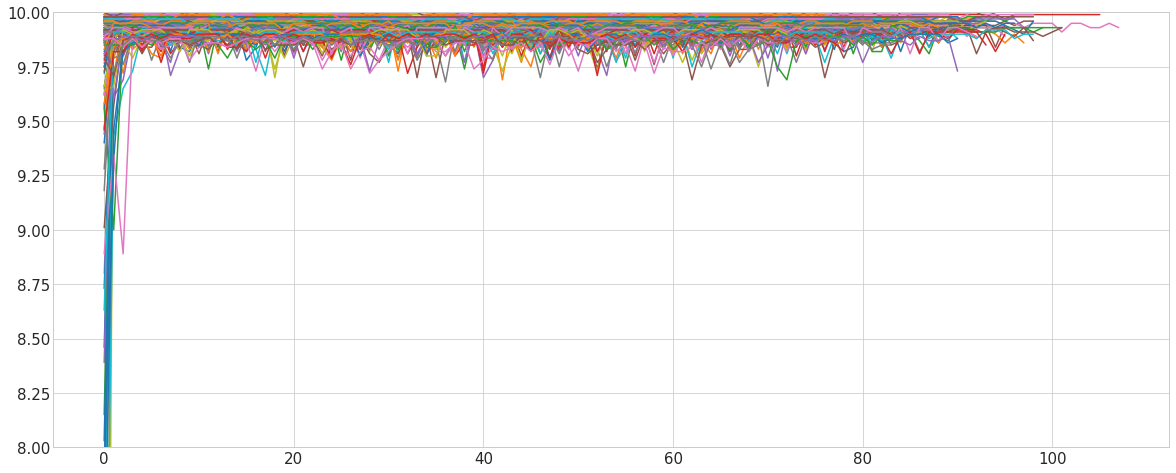

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in range(0, len(plot_list)):
    if i == 26: continue
    plt.plot(plot_list[i])
plt.ylim(8, 10)

#plt.plot(plot_list[0])
# plt.legend(prop={'size': 20})
# plt.xlabel('Iteration', fontsize=15)
# plt.ylabel('Ln P', fontsize=15)

In [4]:
len(plot_list)

179

In [5]:
reward_list = []
episodelength_list = []
collision_list = []
for i in range(NUM_EVAL_EPISODES):
    env.reset()
    current_state = env.current_state_id
    episode_reward = 0
    episode_length = 0
    episode_collision = 0

    while env.terminal==False:
        action =epsilon_greedy(Q[current_state], EPSILON)
        env.step(action)
        S = env.current_state_id
        if env.terminal == True:
            R = 10
        elif env.collided == True:
            R = -0.1
            episode_collision += 1
        else: 
            R = -0.01
        episode_reward += R
        episode_length += 1
        current_state = S
    reward_list.append(episode_reward)
    episodelength_list.append(episode_length)
    collision_list.append(episode_collision)
    print ("episodes: ", i)
        
        

episodes:  0
episodes:  1
episodes:  2
episodes:  3
episodes:  4
episodes:  5
episodes:  6
episodes:  7
episodes:  8
episodes:  9
episodes:  10
episodes:  11
episodes:  12
episodes:  13
episodes:  14
episodes:  15
episodes:  16
episodes:  17
episodes:  18
episodes:  19
episodes:  20
episodes:  21
episodes:  22
episodes:  23
episodes:  24
episodes:  25
episodes:  26
episodes:  27
episodes:  28
episodes:  29
episodes:  30
episodes:  31
episodes:  32
episodes:  33
episodes:  34
episodes:  35
episodes:  36
episodes:  37
episodes:  38
episodes:  39
episodes:  40
episodes:  41
episodes:  42
episodes:  43
episodes:  44
episodes:  45
episodes:  46
episodes:  47
episodes:  48
episodes:  49
episodes:  50
episodes:  51
episodes:  52
episodes:  53
episodes:  54
episodes:  55
episodes:  56
episodes:  57
episodes:  58
episodes:  59
episodes:  60
episodes:  61
episodes:  62
episodes:  63
episodes:  64
episodes:  65
episodes:  66
episodes:  67
episodes:  68
episodes:  69
episodes:  70
episodes:  71
ep

In [6]:
np.mean(episodelength_list)

7.37

In [7]:
np.mean(reward_list)

9.9327

In [8]:
np.mean(collision_list)

0.04